<a href="https://colab.research.google.com/github/Abey12525/PYTHON_GEN/blob/master/TSP_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TRAVELLING SALES MAN PROBLEM 

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline 

In [0]:
class TSP_GA:
  def __init__(self,num_cities=None,random_cities = False):
    """
    Args:
      num_cities: the number of city coordinates to be produced   
    """
    #self.random_cities contains coordinate points of length num_cities
    if random_cities:
      self.random_cities = random_cities
    else:
      self.random_cities = [(random.uniform(0,100),random.uniform(0,100)) for i in range(num_cities)] 
  
  def distance(self,cities):
    """
    Args: 
      cities: coordinate points of cities
    
    Return:
      distance between adjecent coordinate points in 'cities'
    """
    ttl_len = len(cities)
    distance_list = []
    
    for idx in range(ttl_len):
      #initial coordinate points
      x1,y1= cities[idx][0],cities[idx][1]      
      #checking if it is the last element if so the second pair of coordinates are
      #selected from the front of the list
      if idx + 1 != ttl_len:
        x2,y2 = cities[idx+1][0],cities[idx+1][1]
      else:
        x2,y2 = cities[0][0],cities[0][1]
      #distance equation 
      distance_list.append(((x1-x2)**2 + (y1-y2)**2)**0.5)
    return distance_list

  def generate_population(self,cities,pop_len):
    """
    Args:
      cities: coordinate points of cities

      pop_len: the number of individual sequences to produce
    
    Return:
      returns random sequences produced from the initial list of cities
    """
    #generating random sequences from the initial list of cities
    return [random.sample(cities,len(cities)) for i in range(pop_len)]
    
  def fitness(self,pop_list):
    """
    Args:
      pop_list: the list of n different sequence of list
    
    Return:
      returns a list of ranked fitness calculation 
    """
    #fitness calculation -> 1/(sum of distance of individudal sequence) 
    fitness_list = [(idx,1/sum(self.distance(indv))) for idx,indv in enumerate(pop_list)]
    return sorted(fitness_list,key=lambda x: x[1],reverse=True)

  def selection(self,pop_fitness,elite_size,cities):
    """
    Args: 
      pop_fitness: ranked fitness list 

      elite_size: the number indicating the number of fittest individual directly selected

      cities: coordinate points of cities

    Return:
      returns a list of individual sequences for next steps of evolution 
    """

    #rowlet wheel selection 
    pop_fitness_list = np.copy(pop_fitness)
    #getting the sum of fitness values of input fitness list
    pick_limit = sum(pop_fitness_list[:,1])
    
    pop_len = len(pop_fitness_list)
    pop_lt = pop_len - elite_size

    #adding the fittest individuals directly to the selected list
    selected_idx=pop_fitness_list[:elite_size,0]
    
    for i in range(pop_lt):
      partial_sum = 0
      pick = np.random.uniform(0,pick_limit)

      for indv_fitness in pop_fitness_list:
        #partial sum of fitness till now 
        partial_sum+=indv_fitness[1]
        #deciding if the individual is selected
        if pick <= partial_sum :
          selected_idx = np.append(selected_idx,indv_fitness[0])
          break
    
    #returning the selected members from the city list
    selected_indvs = [cities[int(x)] for x in selected_idx]
    return selected_indvs

  def cross_over(self,parent1,parent2):
    """
    Args:
      parent1: an individual sequence selected as parent1 

      parent2: an individual sequence selected as parent2
    
    Return:
      returns a new sequence made from both the parents
    """

    #selecting a random number to decide the splicing point of parent1
    rand = random.randint(0,len(parent1))
    child = parent1[:rand]
    
    #getting the points in child and parent2 so that the child created is unique
    intersect = Counter(child) & Counter(parent2)
    
    #getting the elements from parent2 to add in child sequence
    parent2 = list((Counter(parent2)-intersect).elements())
    
    child += parent2[:]
    return child
  
  def cross_population(self,selected_indvs):
    """
    Args: 
      selected_indvs: list of selected individuals from selection process

    Return:
      returns a crossed population
    """
    ttl_len = len(selected_indvs)
    return [self.cross_over(selected_indvs[i],selected_indvs[ttl_len-i-1]) for i in range(ttl_len)]

  def mutation(self,indv,mutation_rate):
    """
    Args:
      indv: a list containg coordinate sequence

      mutation_rate: float value:[0-1] indicating the rate at which mutation occurs
    """
    indv_len = len(indv)
    for exc_idx in range(indv_len):
      if(random.random()<mutation_rate):
        #selecting a random index to mutate
        exch_idx = random.randint(0,indv_len-1)
        #swapping the elements between exch_idx and exc_idx
        indv[exc_idx],indv[exch_idx] = indv[exch_idx],indv[exc_idx]
    return indv

  def mutate_pop(self,selected_indvs,mutation_rate):
    """
    Args:
      selected_indvs: list of selected individuals from selection process and crossing

      mutation_rate: float value:[0-1] indicating the rate at which mutation occurs

    Return:
      returns a list of mutated population 
    """
    return [self.mutation(indv,mutation_rate) for indv in selected_indvs]

  def new_generation(self,current_gen,elite_size,mutation_rate):
    """
    Args:
      Current_gen: list of sequences representing the current generation of paths

      elite_size: the number indicating the number of fittest individual directly selected

      mutation_rate: float value:[0-1] indicating the rate at which mutation occurs
    
    Return:
      returns a new_generation of sequences
    """
    fitness_rank = self.fitness(current_gen)
    selected_indv = self.selection(fitness_rank,elite_size,current_gen)  
    cross_population = self.cross_population(selected_indv)
    new_gen = self.mutate_pop(cross_population,mutation_rate)
    return new_gen

  def GA(self,elite_size=5,mutation_rate=0.1,generations=100,population_size=70):
    """
    Args:
      elite_size: the number indicating the number of fittest individual directly selected

      mutation_rate: float value:[0-1] indicating the rate at which mutation occurs

      generations: the number of iterations to find the optimal path

      population_size: the number of different sequence to be produced to feed the algorithm      
    """
    #generating the different sequence
    population = self.generate_population(self.random_cities,population_size)
    #perfoming optimization and finding the path 
    for i in range(generations):
      population = self.new_generation(population,elite_size,mutation_rate)
    #getting the fittest sequence 
    final_fitness = self.fitness(population)
    final_verdict = population[final_fitness[0][0]]
    self.path_plot(final_verdict)
    return final_verdict
  
  def path_plot(self,cities):
    """
    Args:
      cities: coordinate points of cities
    """
    plt.figure(figsize=(10,10))
    #getting the x and y coordinates of the cities
    x = [i[0] for i in cities]
    y = [i[1] for i in cities]
    #getting the coordinates inorder to form a loop 
    x1=[x[0],x[-1]]
    y1=[y[0],y[-1]]

    plt.plot(x, y, 'g', x1, y1, 'g')
    plt.scatter (x, y)

    for idx,(xi,yi) in enumerate(zip(x,y)):
      plt.annotate(f"city{idx}",(xi,yi),horizontalalignment='center')
    plt.show()



##Phases in Genetic Algorithm
###1.Initial Population 

###2.Fitness function 
$$p=\frac{f}{\sum_{i=0}^N f_i}$$

###3.Selection

###4.Crossover

###5.Mutation

###This five phases are repeted till 'n' iteration to convergence

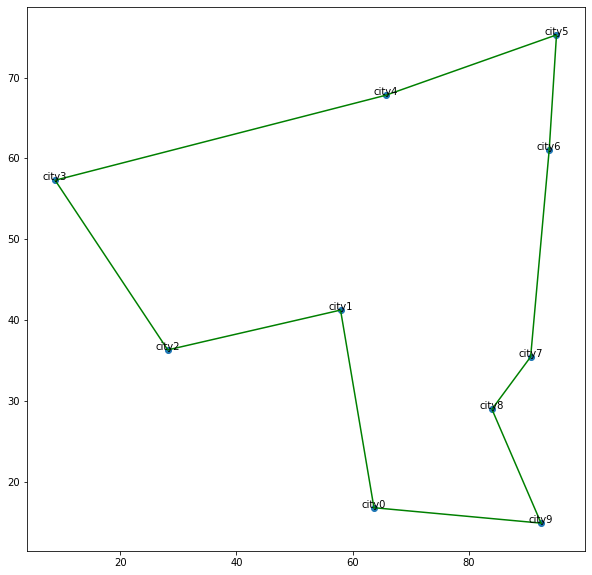

[(63.66400717333007, 16.802072123132394), (57.91548551253349, 41.24485289096881), (28.180621811769534, 36.32075832248167), (8.79746974820902, 57.30288332742126), (65.72964824775234, 67.82409754928221), (95.07949875932744, 75.28531072782118), (93.81680412579186, 61.00067147907471), (90.6276206429175, 35.45728038386796), (83.96618724940441, 28.98061192767346), (92.42297377226151, 14.89372714251418)]


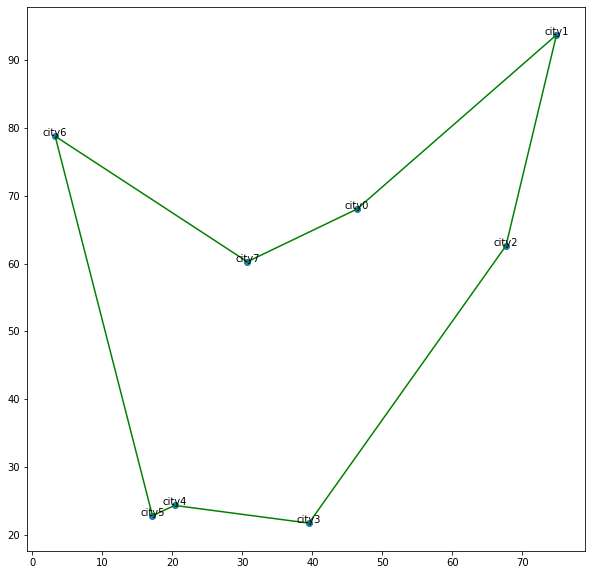

[(46.357477544793426, 68.0355565113187), (74.87519473248727, 93.73086743247585), (67.6521301989977, 62.62332529519975), (39.50073488037388, 21.728208130894643), (20.307909504209555, 24.340998637008106), (17.151003218004668, 22.811889120840068), (3.2488310508458795, 78.78985771750386), (30.698745476615695, 60.271464003058114)]


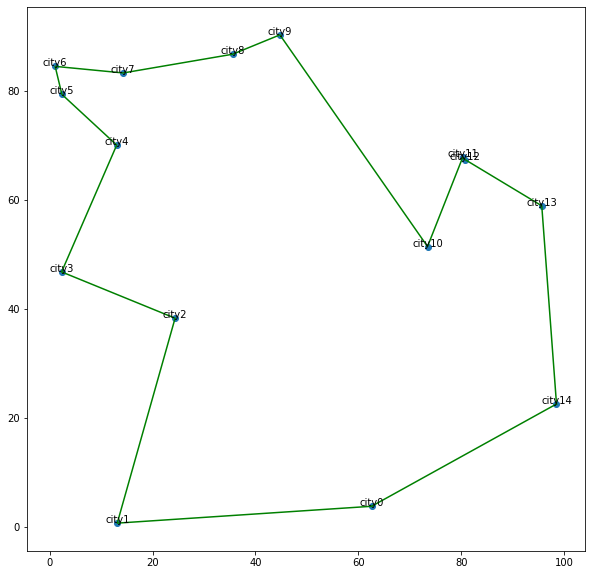

[(62.58681274081279, 3.8755994419642947), (13.140459454141917, 0.7886908412640392), (24.38534256242071, 38.33795806842419), (2.323231443478657, 46.82579747890712), (13.034374281472704, 70.06433885546821), (2.3760952510178845, 79.35863836186769), (1.0687438978060237, 84.4873923059032), (14.297308453630519, 83.28002264811526), (35.565465373386886, 86.71121469375174), (44.756786766486535, 90.25883521672135), (73.45543146535813, 51.47186523030928), (80.29763475150047, 67.81589099790115), (80.81799839030468, 67.36723760823071), (95.66514826477432, 58.934271184023714), (98.5279917224281, 22.620474872212082)]


In [262]:
if __name__ == '__main__':
  city_list = [(8.79746974820902, 57.30288332742126), (65.72964824775234, 67.82409754928221), (83.96618724940441, 28.98061192767346),
               (57.91548551253349, 41.24485289096881), (95.07949875932744, 75.28531072782118), (90.6276206429175, 35.45728038386796), 
               (28.180621811769534, 36.32075832248167), (93.81680412579186, 61.00067147907471), (92.42297377226151, 14.89372714251418),
               (63.66400717333007, 16.802072123132394)]
  tsp_obj = TSP_GA(random_cities=city_list)
  test_list = tsp_obj.GA(5,0.01,200,150)
  print(test_list)

  tsp_obj2 = TSP_GA(8)
  test_list2 = tsp_obj2.GA(5,0.01,100,100)
  print(test_list2)

  tsp_obj2 = TSP_GA(15)
  test_list2 = tsp_obj2.GA(5,0.01,200,150)
  print(test_list2)
